In [89]:
import numpy as np
import matplotlib.pyplot as plt

In [90]:
# ランダムマスクを定義

mask_length = 1000  # マスクの長さを指定
mask = np.random.randint(2, size=mask_length)  # 0または1を要素にもつランダムマスクを生成

In [91]:
#マスクの3倍の長さの検出器を定義

detector_length = mask_length * 3
detector = np.zeros(detector_length)

In [92]:
# 天体の空間分布を定義

N = 180 # 天球上の分割数を指定
object_distribution = np.zeros(N) # 分割数分の配列を定義

# 4つの天体を配置
object_distribution[60] = 10 # 真上から+30度ズレた位置（つまり61番目のインデックス）に天体を配置
object_distribution[90] = 2 # 真上の位置に天体を配置
object_distribution[120] = 1 # 真上から-30度ズレた位置に天体を配置
object_distribution[140] = 1 # 真上から-50度ズレた位置に天体を配置

print(object_distribution)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


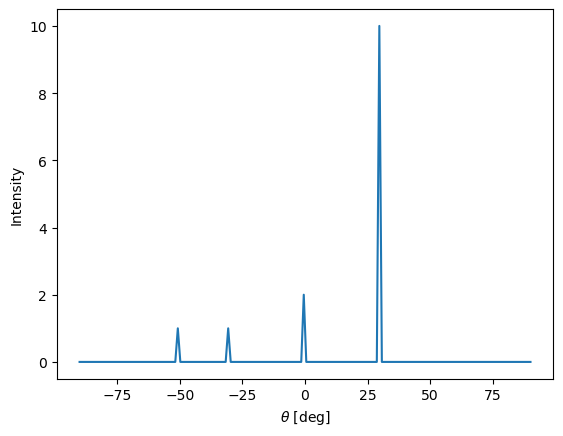

In [93]:
# 天体の空間分布をプロット
theta = np.linspace(90,-90,N) 

plt.plot(theta,object_distribution) # グラフを描画
plt.xlabel("$θ$ [deg]") # x軸のラベルを指定
plt.ylabel("Intensity") # y軸のラベルを指定
plt.show() # グラフを表示

In [94]:
# マスクと検出器の距離
l = 5

for i in [60, 90, 120, 140]:
    # 検出器の中心からどれだけズレた位置からマスクの影が始まるか（値は四捨五入して整数にする）
    d = round(l * np.tan(np.deg2rad(90-i)) - round(mask_length / 2))

    # 検出器の端からマスクの影が始まる位置までの距離
    d_result = round(detector_length / 2) + d 

    # d_result番目のインデックスからmaskを足す
    detector[d_result:d_result + mask_length] += mask * object_distribution[i]

detector_image = detector
print(detector_image)


[0. 0. 0. ... 0. 0. 0.]


In [95]:
# 検出器イメージの右端にマスクの長さ数分の0を追加
detector_image = np.insert(detector_image, len(detector_image), [0] * mask_length)
detector_image_length = len(detector_image)

In [96]:
# マスクと検出器イメージの相関を計算
correlation = []

for i in range(detector_image_length - mask_length):
    inner_product = np.sum(mask * detector_image[i:i+mask_length]) # i番目からi+mask_length番目までの要素を取り出して内積を計算
    correlation.append(inner_product)

correlation_result = np.array(correlation)

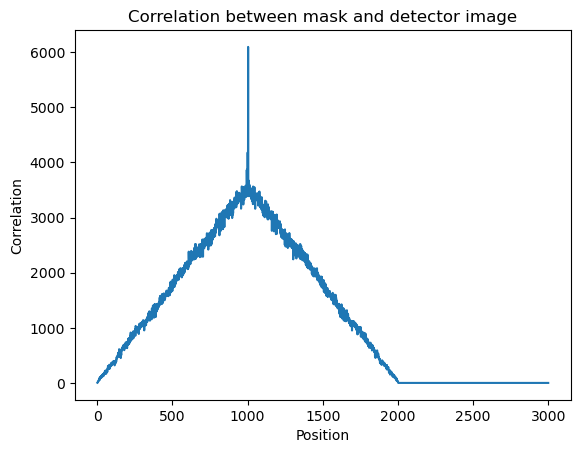

In [97]:
x = np.arange(0, detector_length, 1)

plt.plot(x, correlation_result)
plt.xlabel("Position")
plt.ylabel("Correlation")
plt.title("Correlation between mask and detector image")
plt.show()

[-89.71352349 -89.71323673 -89.7129494  ...  89.85654567  89.85661747
  89.85668919]


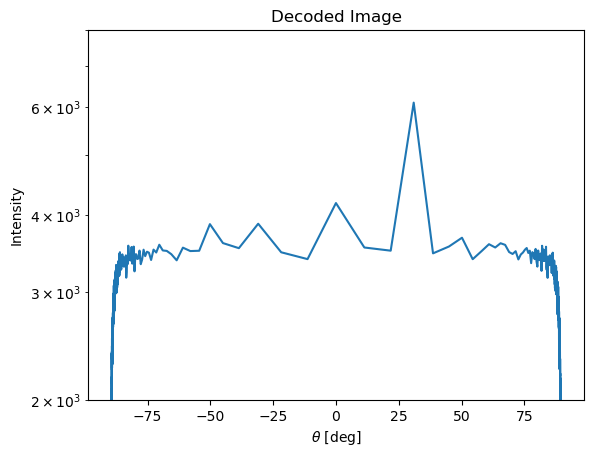

In [98]:
# 検出器の位置を天球上の角度に変換
theta = np.rad2deg(np.arctan((x - round(detector_length / 2) + round(mask_length / 2)) / l))
print(theta)

plt.plot(theta, correlation_result)
plt.xlabel("$θ$ [deg]") 
plt.ylabel("Intensity") 
plt.title("Decoded Image") 
plt.yscale("log") 
plt.ylim(2000, 8000) 
plt.show() 

In [99]:
# デコード画像のピークの位置を出力して、もとの天体の位置と比較

def get_top_values_and_indices(arr, num_values=4):
    # 元の配列の要素のインデックスを大きい順に取得
    sorted_indices = np.argsort(arr)[::-1]
    
    # 大きい順に並び替えた値とそのインデックスを取得
    top_values = arr[sorted_indices][:num_values]
    top_indices = sorted_indices[:num_values]
    
    return top_values, top_indices

# correlation_resultの大きい順に4つの値のインデックスを取得
top_correlation_result_values, top_correlation_result_indices = get_top_values_and_indices(correlation_result, num_values=4)

# 対応するthetaの値を抜き出す
top_theta_values = theta[top_correlation_result_indices]


print("correlation_resultの大きい順に4つの値:", top_correlation_result_values)
print("それに対応するthetaの値:", top_theta_values)


correlation_resultの大きい順に4つの値: [6095. 4182. 3870. 3864.]
それに対応するthetaの値: [ 30.96375653   0.         -30.96375653 -50.19442891]
